<a href="https://colab.research.google.com/github/LDBM42/TFM/blob/main/TFM_LuisDavidBetances_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='328534' size="5"><strong>Obtención del dataset </strong></font><font color='Black' size="5">Creación propia</font>

**Montar Google Drive y Descargar Dataset** 

<font color='Red' size="3"><strong><i>IMPORTANTE: </i></strong></font><font color='Black' size="3"><i>Ejecutar SIEMPRE que se reinicie Google Colab</i></font>

In [ ]:

###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Master_IA/TFM/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import gc # Garbage Collector: para liberar memoria 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_images(path, file_name, copy=False):
  """La nomenclatura del nombre de las imagenes es [[ Numero_4_digitos-output.jpg ]]"""
  
  x = []

  file = open(path + file_name + ".txt", 'r').readlines()

  # Cargar todas las imagenes en orden descendente
  for line in list(file): 
    index = line.find(";")
    if line[0:index] == 'ID': continue # no almacenar encabezado

    id = int(line[0:index]) # almacenar id

    if id < 10:
      id = "000" + str(id)
    elif id < 100:
      id = "00" + str(id)
    elif id < 1000:
      id = "0" + str(id)

    if copy: imname = "-output copia.jpg"
    else: imname = "-output.jpg"

    x.append(np.array(Image.open(path + id + imname)))

  # devolver lista como numpy array
  return np.array(x)


In [ ]:
# Cargar imagenes
# X1 = load_images(BASE_FOLDER+"output_indoor/", "output_indoor")
# X2 = load_images(BASE_FOLDER+"output_indoor_night/", "output_indoor_night")
# X3 = load_images(BASE_FOLDER+"output_outdoor/", "output_outdoor")
# X4 = load_images(BASE_FOLDER+"output_outdoor_night/", "output_outdoor_night")

X1bw = load_images(BASE_FOLDER+"output_indoor/B&W/", "output_indoor", True)
X2bw = load_images(BASE_FOLDER+"output_indoor_night/B&W/", "output_indoor_night", True)
X3bw = load_images(BASE_FOLDER+"output_outdoor/B&W/", "output_outdoor", True)
X4bw = load_images(BASE_FOLDER+"output_outdoor_night/B&W/", "output_outdoor_night", True)

In [ ]:
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)

print()

print(X1bw.shape)
print(X2bw.shape)
print(X3bw.shape)
print(X4bw.shape)

(402, 360, 640, 3)
(204, 360, 640, 3)
(260, 360, 640, 3)
(263, 360, 640, 3)

(402, 360, 640, 3)
(204, 360, 640, 3)
(260, 360, 640, 3)
(263, 360, 640, 3)


In [ ]:
# Concatenar todos los datos
X = np.concatenate((X1,X1bw, X2,X2bw, X3,X3bw, X4,X4bw), axis=0)

In [ ]:
# cargar groundtruth
y1 = np.array(pd.read_table(BASE_FOLDER+"output_indoor/output_indoor.txt" ,sep=';'))
y2 = np.array(pd.read_table(BASE_FOLDER+"output_indoor_night/output_indoor_night.txt" ,sep=';'))
y3 = np.array(pd.read_table(BASE_FOLDER+"output_outdoor/output_outdoor.txt" ,sep=';'))
y4 = np.array(pd.read_table(BASE_FOLDER+"output_outdoor_night/output_outdoor_night.txt" ,sep=';'))

In [ ]:
# convertir texto a lista y luego a numpy array
for i in range(y1.shape[0]):
  y1[i] = np.array(eval(y1[:,1][i]))

for i in range(y2.shape[0]):
  y2[i] = np.array(eval(y2[:,1][i]))

for i in range(y3.shape[0]):
  y3[i] = np.array(eval(y3[:,1][i]))

for i in range(y4.shape[0]):
  y4[i] = np.array(eval(y4[:,1][i]))

In [ ]:
# Concatenar todos los groundtruth
y = np.concatenate((y1,y1, y2,y2, y3,y3, y4,y4), axis=0)

In [ ]:
# Revisar dimensiones del dataset
print(np.shape(X))
print(np.shape(y))

(2258, 360, 640, 3)
(2258, 4)


In [ ]:
# Guardar imagenes y labels en formato .npy
np.save(BASE_FOLDER+'/output_all_array_IMAGES.npy', X)
np.save(BASE_FOLDER+'/output_all_array_LABELS.npy', y)

In [ ]:
# Guardar imagenes y labels en formato .npy y .npz
y = np.load(BASE_FOLDER+'/output_all_array_LABELS.npy', allow_pickle=True)

X = np.load(BASE_FOLDER+'/output_all_array_IMAGES.npy', allow_pickle=True)
# X = np.load(BASE_FOLDER+'/output_all_array_IMAGES_Normalizado.npz')
# X = X['arr_0']

In [ ]:
# alto y ancho de la imagen
H, W = np.shape(X)[1:3]
print("W=" + str(W), "H=" + str(H))

W=640 H=360


In [ ]:
#Almacenar groundtruth en variables separadas y redimensionar entre 0 y 1
x, y_, w, h = y[:,0]/W, y[:,1]/H, y[:,2]/W, y[:,3]/H

In [ ]:
# Estructura del groundtruth
print("X=" + str(x[0]) + "\nY=" + str(y_[0]) + "\nW=" + str(w[0]) + "\nH=" + str(h[0]))

X=0.890625
Y=0.125
W=0.1078125
H=0.8111111111111111


In [ ]:
# Cambiar imagen a un Rango de valores entre 0 y 1
# X = X/255
# X = np.float32(X)

In [ ]:
#Colocar el groundtruth nuevamente en una sola variable
y=[]
for i in range(x.shape[0]):
  y.append([x[i], y_[i], w[i], h[i]])

y = np.array(y)

# imprimir dimensiones
y.shape

(2258, 4)

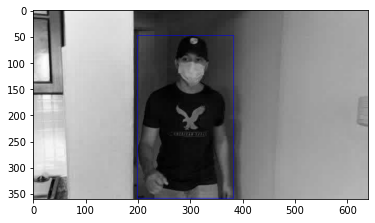

In [ ]:
import cv2

# mostrar imagen random con su bounding box
num = np.random.randint(0,X.shape[0])
img = X[num]
img2 = img.copy()

x_temp, y_temp, w_temp, h_temp = int(x[num]*W), int(y_[num]*H), int(w[num]*W), int(h[num]*H) 
pt1= x_temp, y_temp
pt2= x_temp+w_temp, y_temp+h_temp 

cv2.rectangle(img2, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=1)

plt.imshow(img2)
plt.show()

**Inspeccionando el conjunto de datos**


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


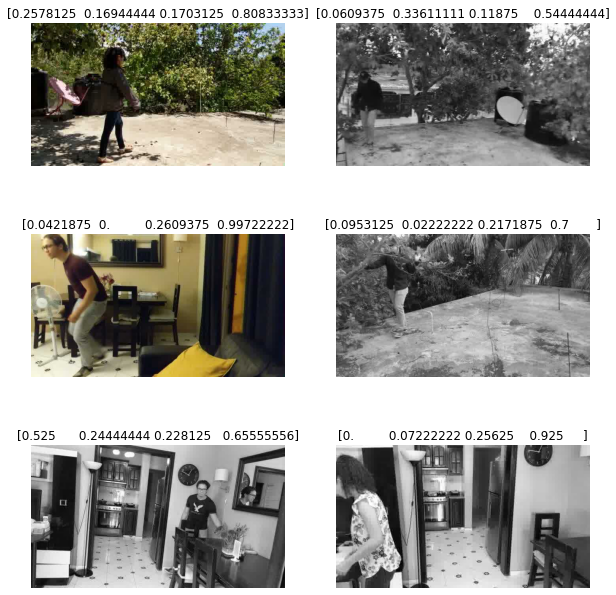

In [ ]:
fig = plt.figure(figsize=(10,11))

# indices de los subplots
index = np.arange(1, 7)
i = 0

# plotear 6 imagenes aleatorias del dataset, con sus etiquetas
for n in np.random.randint(0, len(y), 6): 
    fig.add_subplot(3, 2, index[i])
    
    img = X[n]
    plt.imshow(img)
    label = y[n]
    plt.title(label)
    plt.axis('off')
    
    i += 1 # aumentar indice


## <font color='328534' size="5"><strong>Arquitectura MOBILENET</strong></font>
---
<img src='https://drive.google.com/uc?export=view&id=1y-cepqHzXXu5KkTlGNexs5MnvzmshZTW' width=700px>

---

### <font color='6FBC71' size="4"><strong>-------------TRANSFER LEARNING-------------MOBILENET</strong></font>

---



**Acondicionando datos como en la Red MOVILENET**

In [ ]:

from tensorflow.keras.applications import mobilenet
from sklearn.model_selection import train_test_split

# dividir en datos de entrenamiendo, test 
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=20) # 20% para datos de test


In [ ]:

# preprocesando los datos como ImageNet
x_tr = mobilenet.preprocess_input(x_tr)                                            # Datos de train preprocesados como ImageNet
x_te = mobilenet.preprocess_input(x_te)                                            # Datos de test preprocesados


In [ ]:
# guardar datos de prueba para usar en cualquier momento
np.save(BASE_FOLDER+"img_test_Own_datasets_PREPROCESS.npy", x_te)
np.save(BASE_FOLDER+'img_test_Own_datasets_labels_PREPROCESS.npy', y_te)

In [ ]:

print('x train:', x_tr.shape)
print('y train:', y_tr.shape, '\n')

print('x test: ', x_te.shape)
print('y test: ', y_te.shape, '\n')


x train: (1806, 360, 640, 3)
y train: (1806, 4) 

x test:  (452, 360, 640, 3)
y test:  (452, 4) 



In [ ]:
x, y_, w, h = y_tr[:,0], y_tr[:,1], y_tr[:,2], y_tr[:,3]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


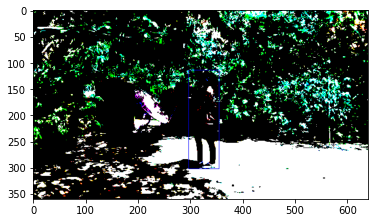

In [ ]:
import cv2

# mostrar imagen random con su bounding box
num = np.random.randint(0,x_tr.shape[0])
img = x_tr[num]
img2 = img.copy()

x_temp, y_temp, w_temp, h_temp = int(x[num]*W), int(y_[num]*H), int(w[num]*W), int(h[num]*H) 
pt1= x_temp, y_temp
pt2= x_temp+w_temp, y_temp+h_temp 

cv2.rectangle(img2, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=1)

plt.imshow(img2)
plt.show()

**Cargando la topología de CNN (base model)**

In [ ]:
# del X, x, y_, w, h
gc.collect()

In [ ]:

from tensorflow.keras.applications import MobileNet # Importamos modelo pre-entrenado MobileNet

input_shape = x_tr[0, :, :, :].shape                # Dimensiones de los datos de entrada

base_model = MobileNet(weights='imagenet',          # Traemos los pesos de imagenet
                       include_top=False,           # No incluir el top model
                       input_shape=input_shape,     # Se incluye el nuevo input shape
                       pooling='max')               # Se le aplica un global max pooling

base_model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 360, 640, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 180, 320, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 180, 320, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 180, 320, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 180, 320, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 180, 320, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 180, 320, 32

**Creando el Top Model y realizamos el TRANSFER LEARNING**

En esta ocasion utilizaré el Functional API para crear el modelo.

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

base_model.trainable = False # Congelamos las capas Conv2D

inputs = Input(shape=input_shape)

## BASE MODEL PREENTRENADO ##
# training=False es para que las capas de BatchNormalization se mantengan en modo de inferencia
# esto sirve para que al realizar el fine tuning (el proximo paso) sobre este modelo preentrenado, 
# los nuevos updates de los pesos no destruyan lo que el modelo aprenda en este paso (Transfer Learning)
# https://www.tensorflow.org/guide/keras/transfer_learning
tlm = base_model(inputs, training=False)

## TOP MODEL ##
tlm = Dense(512, activation='relu')(tlm)  # 512 neuronas debido a que la salida del base model con el 'global_max_pooling2d'  es 1024
tlm = Dense(256, activation='relu')(tlm)
tlm = Dense(128, activation='relu')(tlm)
tlm = Dense(32, activation='relu')(tlm)
outputs = Dense(4, activation='sigmoid')(tlm)

transfer_learning_model = Model(inputs=inputs, outputs=outputs)

transfer_learning_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 360, 640, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 132 

**Funcion Auxiliar**

In [ ]:

import gc # Garbage Collector: para liberar memoria 
from tensorflow.keras.callbacks import Callback

# Callback personalizado para incluir en la lista de callbacks mientras entrenamos el modelo
# Este libera memoria al finalizar cada epoch
class GarbageCollectorCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect() # liberar memoria con garbage collector
        

**Entrenando el modelo**

In [ ]:

# Importamos los paquetes necesarios
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
from google.colab import drive


In [ ]:
lr = 1e-4 #1e-3 #1e-5 
epochs = 50
batch_size = 16 #8- #16 #32- #64


# Compilar el modelo
transfer_learning_model.compile(loss="mse", optimizer=Adam(lr)) 

# Entrenamiento de la CNN
# Se detendrá el entrenamiento cuando no haya mejoras en el loss validation por 15 epochs consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Almaceno el mejor modelo en Google Drive 
# checkpoint
filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

print("[INFO]: Entrenando la CNN...\n")
H_TRANSFER_LEARNING = transfer_learning_model.fit(x_tr, y_tr, validation_split = 0.1, batch_size=batch_size, 
                                                  epochs=epochs, callbacks=[GarbageCollectorCallback(), early_stopping, checkpoint], verbose=1)


[INFO]: Entrenando la CNN...

Epoch 1/50
102/102 [==============================] - 13s 106ms/step - loss: 0.0475 - val_loss: 0.0199

Epoch 00001: val_loss improved from inf to 0.01993, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS.h5
Epoch 2/50
102/102 [==============================] - 10s 98ms/step - loss: 0.0199 - val_loss: 0.0163

Epoch 00002: val_loss improved from 0.01993 to 0.01629, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS.h5
Epoch 3/50
102/102 [==============================] - 10s 98ms/step - loss: 0.0188 - val_loss: 0.0161

Epoch 00003: val_loss improved from 0.01629 to 0.01605, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS.h5
Epoch 4/50
102/102 [==============================] - 10s 97ms/step - loss: 0.0

In [ ]:
# del base_model
# del transfer_learning_model
# gc.collect()

**Observando el proceso de entrenamiento**

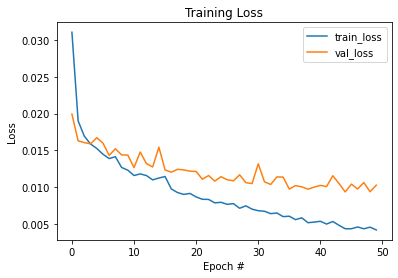

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

H=H_TRANSFER_LEARNING

XH = np.arange(0, len(H_TRANSFER_LEARNING.epoch))

# plotear Gráfica
plt.plot(XH, H.history["loss"], label="train_loss")
plt.plot(XH, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import json
# conseguir el dic con las metricas de cada epoch
h_dict = H_TRANSFER_LEARNING.history

filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_50epoch_PREPROCESS.json"
# Guardar el history como un json
json.dump(h_dict, open(filepath, 'w'))

### <font color='6FBC71' size="4"><strong>------------------FINE-TUNING------------------MOBILENET</strong></font>

---
<font color='Red' size="3"><strong><i>IMPORTANTE: </i></strong></font><font color='Black' size="3"><i>Realizar este paso luego de realizar el paso anterior -> transfer learning.</i></font>



**FINE TUNNING**

In [ ]:
# descongelamos el base model
base_model.trainable = True

# En este caso solo congelamos las capas hasta el 2do bloque convolucional, 
# del 3ro para abajo se re-entrena
for layer in base_model.layers:
  if layer.name == 'conv_dw_3': break 
  layer.trainable = False # congelar todas las capas que no queramos reentrenar
  print('Capa ' + layer.name + ' congelada...') 

transfer_learning_model.summary()

Capa input_3 congelada...
Capa conv1 congelada...
Capa conv1_bn congelada...
Capa conv1_relu congelada...
Capa conv_dw_1 congelada...
Capa conv_dw_1_bn congelada...
Capa conv_dw_1_relu congelada...
Capa conv_pw_1 congelada...
Capa conv_pw_1_bn congelada...
Capa conv_pw_1_relu congelada...
Capa conv_pad_2 congelada...
Capa conv_dw_2 congelada...
Capa conv_dw_2_bn congelada...
Capa conv_dw_2_relu congelada...
Capa conv_pw_2 congelada...
Capa conv_pw_2_bn congelada...
Capa conv_pw_2_relu congelada...
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 360, 640, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
__________________

In [ ]:
lr = 1e-5
epochs = 30
batch_size = 8


# Compilar el modelo
transfer_learning_model.compile(loss="mse", optimizer=Adam(lr)) 

# Entrenamiento de la CNN
# Se detendrá el entrenamiento cuando no haya mejoras en el loss validation por 10 epochs consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Almaceno el mejor modelo en Google Drive 
# checkpoint
filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

print("[INFO]: Entrenando la CNN...\n")
H_TRANSFER_LEARNING = transfer_learning_model.fit(x_tr, y_tr, validation_split = 0.1, batch_size=batch_size, 
                                                  epochs=epochs, callbacks=[GarbageCollectorCallback(), early_stopping, checkpoint], verbose=1)


[INFO]: Entrenando la CNN...

Epoch 1/30
204/204 [==============================] - 36s 161ms/step - loss: 0.0053 - val_loss: 0.0084

Epoch 00001: val_loss improved from inf to 0.00839, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS_FT.h5
Epoch 2/30
204/204 [==============================] - 31s 154ms/step - loss: 0.0042 - val_loss: 0.0084

Epoch 00002: val_loss did not improve from 0.00839
Epoch 3/30
204/204 [==============================] - 31s 154ms/step - loss: 0.0032 - val_loss: 0.0078

Epoch 00003: val_loss improved from 0.00839 to 0.00781, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS_FT.h5
Epoch 4/30
204/204 [==============================] - 32s 155ms/step - loss: 0.0031 - val_loss: 0.0071

Epoch 00004: val_loss improved from 0.00781 to 0.00709, saving model to /content/drive/My Drive/Master_IA/TFM/d

In [ ]:
history = {"loss":[0.0053,0.0042,0.0032,0.0031,0.0024,0.0022,0.0020,0.0019,0.0019,0.0016,0.0016,0.0015,0.0021,0.0016,0.0014,0.0014,0.0013,0.0014,0.0014,0.0018,0.0012,0.0011,0.0011,0.0011,0.0012,0.0011,0.0011,0.0011,0.0011,0.0011],
"val_loss":[0.0084,0.0084,0.0078,0.0071,0.0071,0.0076,0.0062,0.0064,0.0067,0.0060,0.0064,0.0062,0.0064,0.0062,0.0064,0.0062,0.0070,0.0060,0.0061,0.0058,0.0058,0.0058,0.0060,0.0057,0.0061,0.0058,0.0054,0.0056,0.0056,0.0052]}

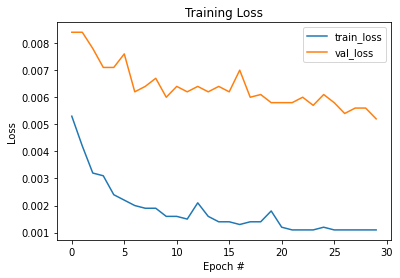

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

H = np.arange(0, 30)

# plotear Gráfica
plt.plot(H, history["loss"], label="train_loss")
plt.plot(H, history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import json
                        
filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_30epoch_PREPROCESS_FT.json"

# Guardar el history como un json
json.dump(history, open(filepath, 'w'))

In [ ]:
lr = 1e-5
epochs = 50
batch_size = 8


# Compilar el modelo
transfer_learning_model.compile(loss="mse", optimizer=Adam(lr)) 

# Entrenamiento de la CNN
# Se detendrá el entrenamiento cuando no haya mejoras en el loss validation por 10 epochs consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Almaceno el mejor modelo en Google Drive 
# checkpoint
filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_02.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

print("[INFO]: Entrenando la CNN...\n")
H_TRANSFER_LEARNING = transfer_learning_model.fit(x_tr, y_tr, validation_split = 0.1, batch_size=batch_size, 
                                                  epochs=epochs, callbacks=[GarbageCollectorCallback(), early_stopping, checkpoint], verbose=1)


[INFO]: Entrenando la CNN...

Epoch 1/50
204/204 [==============================] - 34s 158ms/step - loss: 0.0012 - val_loss: 0.0050

Epoch 00001: val_loss improved from inf to 0.00495, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_02.h5
Epoch 2/50
204/204 [==============================] - 32s 156ms/step - loss: 0.0011 - val_loss: 0.0054

Epoch 00002: val_loss did not improve from 0.00495
Epoch 3/50
204/204 [==============================] - 31s 154ms/step - loss: 0.0012 - val_loss: 0.0052

Epoch 00003: val_loss did not improve from 0.00495
Epoch 4/50
204/204 [==============================] - 32s 155ms/step - loss: 9.9906e-04 - val_loss: 0.0051

Epoch 00004: val_loss did not improve from 0.00495
Epoch 5/50
204/204 [==============================] - 31s 154ms/step - loss: 9.8098e-04 - val_loss: 0.0055

Epoch 00005: val_loss did not improve from 0.00495
Epoch 6/50
204/204 [======================

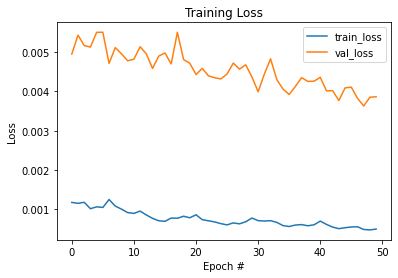

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

H=H_TRANSFER_LEARNING

XH = np.arange(0, len(H_TRANSFER_LEARNING.epoch))

# plotear Gráfica
plt.plot(XH, H.history["loss"], label="train_loss")
plt.plot(XH, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import json
# conseguir el dic con las metricas de cada epoch
h_dict = H_TRANSFER_LEARNING.history

filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_50epoch_PREPROCESS_FT_02.json"
# Guardar el history como un json
json.dump(h_dict, open(filepath, 'w'))

In [ ]:
lr = 1e-5
epochs = 50
batch_size = 8


# Compilar el modelo
transfer_learning_model.compile(loss="mse", optimizer=Adam(lr)) 

# Entrenamiento de la CNN
# Se detendrá el entrenamiento cuando no haya mejoras en el loss validation por 10 epochs consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Almaceno el mejor modelo en Google Drive 
# checkpoint
filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_03.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

print("[INFO]: Entrenando la CNN...\n")
H_TRANSFER_LEARNING = transfer_learning_model.fit(x_tr, y_tr, validation_split = 0.1, batch_size=batch_size, 
                                                  epochs=epochs, callbacks=[GarbageCollectorCallback(), early_stopping, checkpoint], verbose=1)


[INFO]: Entrenando la CNN...

Epoch 1/50
204/204 [==============================] - 35s 164ms/step - loss: 5.8074e-04 - val_loss: 0.0038

Epoch 00001: val_loss improved from inf to 0.00383, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_03.h5
Epoch 2/50
204/204 [==============================] - 32s 157ms/step - loss: 6.0172e-04 - val_loss: 0.0040

Epoch 00002: val_loss did not improve from 0.00383
Epoch 3/50
204/204 [==============================] - 32s 157ms/step - loss: 5.1976e-04 - val_loss: 0.0038

Epoch 00003: val_loss improved from 0.00383 to 0.00378, saving model to /content/drive/My Drive/Master_IA/TFM/deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_03.h5
Epoch 4/50
204/204 [==============================] - 32s 155ms/step - loss: 4.6122e-04 - val_loss: 0.0037

Epoch 00004: val_loss improved from 0.00378 to 0.00371, saving model to /content/drive/My D

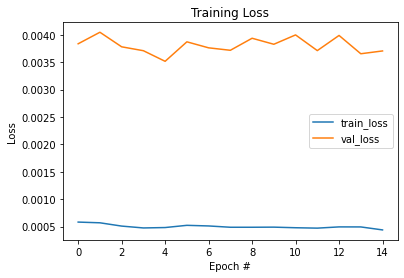

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

H=H_TRANSFER_LEARNING

XH = np.arange(0, len(H_TRANSFER_LEARNING.epoch))

# plotear Gráfica
plt.plot(XH, H.history["loss"], label="train_loss")
plt.plot(XH, H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import json
# conseguir el dic con las metricas de cada epoch
h_dict = H_TRANSFER_LEARNING.history

filepath = BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_15epoch_PREPROCESS_FT_03.json"
# Guardar el history como un json
json.dump(h_dict, open(filepath, 'w'))

**Realizando Predicciones**

In [ ]:
from tensorflow.keras.models import load_model
import imutils

#Cargar modelo
model = load_model(BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_02.h5")

#Cargar imagenes de prueba y labels
imgs = np.load(BASE_FOLDER+"img_test_Own_datasets_PREPROCESS.npy")
y = np.load(BASE_FOLDER+'img_test_Own_datasets_labels_PREPROCESS.npy')

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...\n")
y_pred = model.predict(imgs)


[INFO]: Evaluando el modelo...



In [ ]:
# modelos y predicciones

model_0 = load_model(BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS.h5")
model_1 = load_model(BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT.h5")
model_2 = load_model(BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_02.h5")
model_3 = load_model(BASE_FOLDER+"deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_03.h5")

y_pred_0 = model_0.predict(imgs)
y_pred_1 = model_1.predict(imgs)
y_pred_2 = model_2.predict(imgs)
y_pred_3 = model_3.predict(imgs)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error, make_scorer

metricas = {
  'MAE' : lambda y, y_pred: mean_absolute_error(y, y_pred),
  'MSE' : lambda y, y_pred: mean_squared_error(y, y_pred),
  'RMSE': lambda y, y_pred: mean_squared_error(y, y_pred, squared=False), # squared=False devuelve RMSE,
  'R2'  : lambda y, y_pred: r2_score(y, y_pred)}

In [ ]:
#deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_16_PREPROCESS

MAE_0 = round(metricas['MAE'](y, y_pred_0), 4)
MSE_0 = round(metricas['MSE'](y, y_pred_0), 4)
RMSE_0 = round(metricas['RMSE'](y, y_pred_0), 4)
R2_0 = round(metricas['R2'](y, y_pred_0), 4)

print('mean absolute error:\t', MAE_0)
print('mean squared error:\t', MSE_0)
print('root mean quared error:\t', RMSE_0)
print('r2 score:\t\t', R2_0)

mean absolute error:	 0.0728
mean squared error:	 0.0096
root mean quared error:	 0.0981
r2 score:		 0.5351


In [ ]:
#deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT

MAE_1 = round(metricas['MAE'](y, y_pred_1), 4)
MSE_1 = round(metricas['MSE'](y, y_pred_1), 4)
RMSE_1 = round(metricas['RMSE'](y, y_pred_1), 4)
R2_1 = round(metricas['R2'](y, y_pred_1), 4)

print('mean absolute error:\t', MAE_1)
print('mean squared error:\t', MSE_1)
print('root mean quared error:\t', RMSE_1)
print('r2 score:\t\t', R2_1)

mean absolute error:	 0.0493
mean squared error:	 0.0048
root mean quared error:	 0.0692
r2 score:		 0.7583


In [ ]:
#deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_02

MAE_2 = round(metricas['MAE'](y, y_pred_2), 4)
MSE_2 = round(metricas['MSE'](y, y_pred_2), 4)
RMSE_2 = round(metricas['RMSE'](y, y_pred_2), 4)
R2_2 = round(metricas['R2'](y, y_pred_2), 4)

print('mean absolute error:\t', MAE_2)
print('mean squared error:\t', MSE_2)
print('root mean quared error:\t', RMSE_2)
print('r2 score:\t\t', R2_2)

mean absolute error:	 0.0413
mean squared error:	 0.0036
root mean quared error:	 0.0599
r2 score:		 0.8225


In [ ]:
#deepCNN_MOBILENET_TRANSFER_LEARNING_Person_Recognition_OWN_datasets_8_PREPROCESS_FT_03

MAE_3 = round(metricas['MAE'](y, y_pred_3), 4)
MSE_3 = round(metricas['MSE'](y, y_pred_3), 4)
RMSE_3 = round(metricas['RMSE'](y, y_pred_3), 4)
R2_3 = round(metricas['R2'](y, y_pred_3), 4)

print('mean absolute error:\t', MAE_3)
print('mean squared error:\t', MSE_3)
print('root mean quared error:\t', RMSE_3)
print('r2 score:\t\t', R2_3)

mean absolute error:	 0.0419
mean squared error:	 0.0037
root mean quared error:	 0.0611
r2 score:		 0.819


In [ ]:
#deepCNN_MOBILENET_FINE_TUNING_Person_Recognition_datasets_16_CROSSWALK.h5

MAE_CW = 0.0734
MSE_CW = 0.0084
RMSE_CW = 0.0917
R2_CW = 0.0000     # el valor es -5.5329 y todo valor negativo equivale a 0.000

print('mean absolute error:\t', MAE_CW)
print('mean squared error:\t', MSE_CW)
print('root mean quared error:\t', RMSE_CW)
print('r2 score:\t\t', R2_CW)

mean absolute error:	 0.0734
mean squared error:	 0.0084
root mean quared error:	 0.0917
r2 score:		 0.0


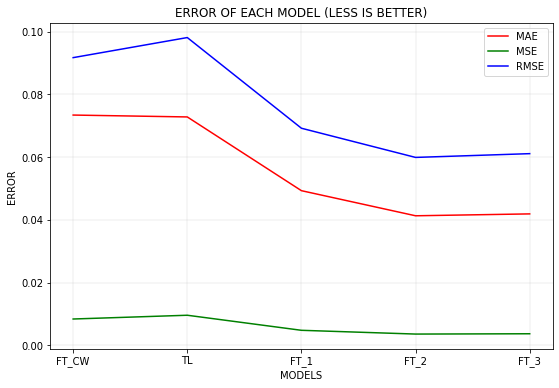

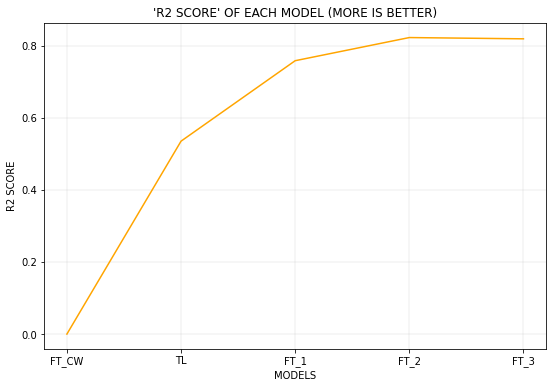

In [ ]:
# Graficar error MAE 
X = ['FT_CW', 'TL', 'FT_1', 'FT_2', 'FT_3'] # modelos
MAE_error = [MAE_CW, MAE_0, MAE_1, MAE_2, MAE_3]
MSE_error = [MSE_CW, MSE_0, MSE_1, MSE_2, MSE_3]
RMSE_error = [RMSE_CW, RMSE_0, RMSE_1, RMSE_2, RMSE_3]

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, MAE_error, color='red', label="MAE")   
ax.plot(X, MSE_error, color='green', label="MSE")   
ax.plot(X, RMSE_error, color='blue', label="RMSE")  

ax.set_xlabel('MODELS')
ax.set_ylabel('ERROR')
plt.xticks(X) # mostrar en 'x' todos los modelos
plt.grid(linewidth=0.2)
plt.title('ERROR OF EACH MODEL (LESS IS BETTER)')
print('\n')
plt.legend(loc='best')
plt.show()


# ---------------------------------------------

R2_error = [R2_CW, R2_0, R2_1, R2_2, R2_3]

_, ax = plt.subplots(figsize=(9,6)) 
ax.set_xlabel('MODELS')
ax.set_ylabel('R2 SCORE')  
plt.grid(linewidth=0.2)
ax.plot(X, R2_error, color='orange') 
plt.title("'R2 SCORE' OF EACH MODEL (MORE IS BETTER)")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
R2_CW = -5.5329
R2_error = [R2_0, R2_1, R2_2, R2_3, R2_CW]

In [ ]:
df = pd.DataFrame(columns=['TRANSFER_LEARNING_OWN', 'FINE_TUNING_1', 'FINE_TUNING_2', 'FINE_TUNING_3', 'FINE_TUNING_CW'], 
                  index=['MAE', 'MSE', 'RMSE', 'R2'])

title = 'METRICS OF EACH PRE-TRAINED MODEL'
print('\n\n' + chr(27)+'[1;91m' + (' '*int((90-len(title))/2)) + title + '\n' + ('_'*90) + '\n')

# agregar a dataframe las metricas calculadas 
df.loc['MAE'] = MAE_error
df.loc['MSE'] = MSE_error
df.loc['RMSE'] = RMSE_error
df.loc['R2'] = R2_error

display(df)
print()



                            METRICS OF EACH PRE-TRAINED MODEL
__________________________________________________________________________________________



,TRANSFER_LEARNING_OWN,FINE_TUNING_1,FINE_TUNING_2,FINE_TUNING_3,FINE_TUNING_CW
MAE,0.0734,0.0728,0.0493,0.0413,0.0419
MSE,0.0084,0.0096,0.0048,0.0036,0.0037
RMSE,0.0917,0.0981,0.0692,0.0599,0.0611
R2,0.5351,0.7583,0.8225,0.819,-5.5329


In [ ]:
import cv2 as cv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


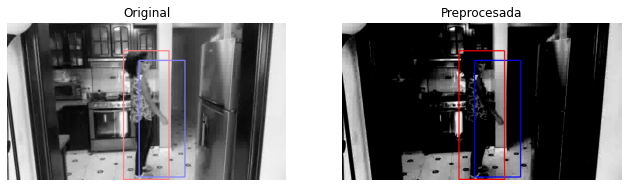

<Figure size 432x288 with 0 Axes>

In [ ]:
ind = np.random.randint(0,imgs.shape[0])
image = imutils.resize(imgs[ind], width=700)
H2, W2 = image.shape[:2]

img_copy = image.copy()*255

x_temp, y_temp, w_temp, h_temp = int(y_pred[ind][0]*W2), int(y_pred[ind][1]*H2), int(y_pred[ind][2]*W2), int(y_pred[ind][3]*H2) 
pt1= x_temp, y_temp
pt2= x_temp+w_temp, y_temp+h_temp 
cv.rectangle(image, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=2) 
cv.rectangle(img_copy, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=2) 


x_temp, y_temp, w_temp, h_temp = int(y[ind][0]*W2), int(y[ind][1]*H2), int(y[ind][2]*W2), int(y[ind][3]*H2) 
pt1= x_temp, y_temp
pt2= x_temp+w_temp, y_temp+h_temp 
cv.rectangle(image, pt1=pt1, pt2=pt2, color=(255,0,0), thickness=2) 
cv.rectangle(img_copy, pt1=pt1, pt2=pt2, color=(255,0,0), thickness=2) 



fig = plt.figure(figsize=(11,10))


img_copy = (img_copy - np.min(img_copy)) / (np.max(img_copy)-np.min(img_copy))

fig.add_subplot(1, 2, 1)
plt.imshow(img_copy)
plt.title("Original")
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(image)
plt.title("Preprocesada")
plt.axis('off')



# plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


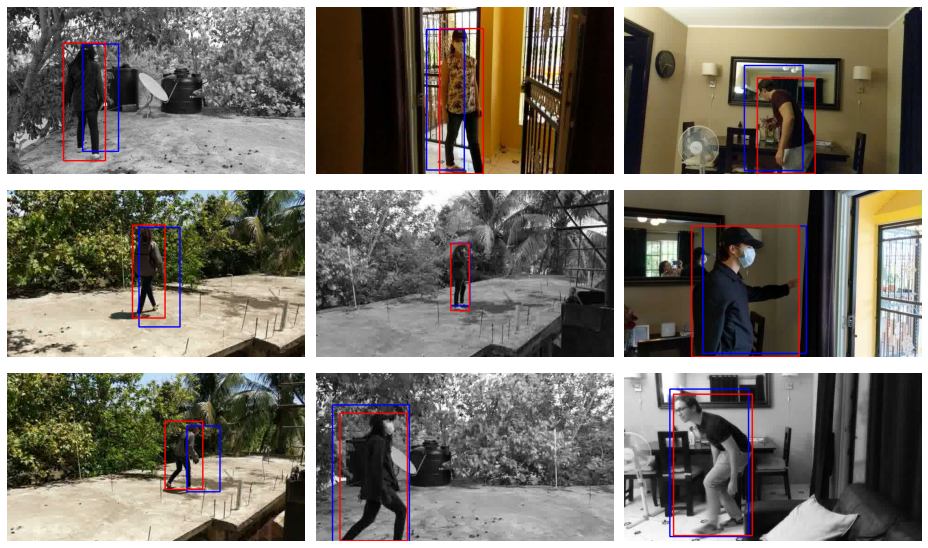

In [ ]:

fig = plt.figure(figsize=(13,8))

# indices de los subplots
index = np.arange(1, 10)
i = 0

# plotear 9 imagenes aleatorias del dataset, con sus boundingboxes
for n in np.random.randint(0, len(y_pred), 9): 
    fig.add_subplot(3, 3, index[i])
    
    image = imgs[n]
    H2, W2 = image.shape[:2]
    img_copy = image.copy()*255
    img_copy = (img_copy - np.min(img_copy)) / (np.max(img_copy)-np.min(img_copy))

    x_temp, y_temp, w_temp, h_temp = int(y_pred[n][0]*W2), int(y_pred[n][1]*H2), int(y_pred[n][2]*W2), int(y_pred[n][3]*H2) 
    pt1= x_temp, y_temp
    pt2= x_temp+w_temp, y_temp+h_temp 
    cv.rectangle(img_copy, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=2)  

    x_temp, y_temp, w_temp, h_temp = int(y[n][0]*W2), int(y[n][1]*H2), int(y[n][2]*W2), int(y[n][3]*H2) 
    pt1= x_temp, y_temp
    pt2= x_temp+w_temp, y_temp+h_temp 
    cv.rectangle(img_copy, pt1=pt1, pt2=pt2, color=(255,0,0), thickness=2) 

    plt.imshow(img_copy)
    plt.axis('off')
    plt.tight_layout()
    
    i += 1 # aumentar indice




##Visualizar modelo y Activación

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 360, 640, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 132 

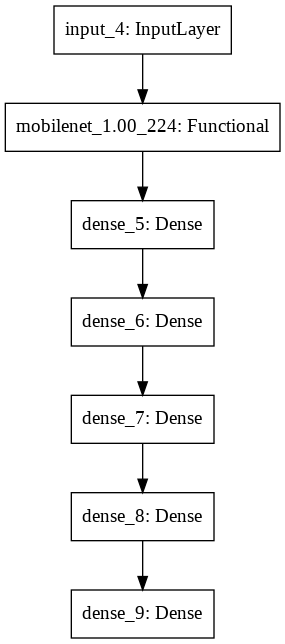

In [ ]:
from keras.utils import plot_model 
plot_model(model, to_file='model.png')

In [ ]:
layer_outputs = [layer.output for layer in model.layers[1].layers[1:]]
layer_names = [layer.name for layer in model.layers[1].layers[1:]]

for i, layer_output in enumerate(layer_outputs):
  print(layer_names[i])
  print(layer_output)
  print()

conv1
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv1/Conv2D:0', description="created by layer 'conv1'")

conv1_bn
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv1_bn/FusedBatchNormV3:0', description="created by layer 'conv1_bn'")

conv1_relu
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv1_relu/Relu6:0', description="created by layer 'conv1_relu'")

conv_dw_1
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv_dw_1/depthwise:0', description="created by layer 'conv_dw_1'")

conv_dw_1_bn
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv_dw_1_bn/FusedBatchNormV3:0', description="created by layer 'conv_dw_1_bn'")

conv_dw_1_relu
KerasTensor(type_spec=TensorSpec(shape=(None, 180, 320, 32), dtype=tf.float32, name=None), name='conv

In [ ]:
# extraer outputs de todas las capas
from keras import models, Input

model2view = models.Model(inputs=model.layers[1].layers[0].input, outputs=layer_outputs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


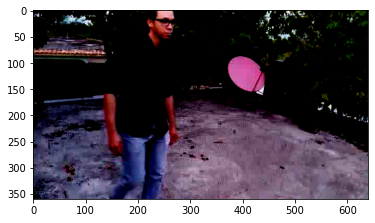

In [ ]:
# Visualizando imagen 
sample = 0

img = imgs[sample].copy()
# img = (img - np.min(img)) / (np.max(img) - np.min(img)) # pasar a rango 0-1

plt.imshow(img)
plt.show()


img = np.expand_dims(img, axis=0) # a array de (1, 360, 640, 3)

In [ ]:
feature_maps = model2view.predict(img)

In [ ]:
# elegir capas a mostrar
layer_name, feature_map = layer_names[:30], feature_maps[:30]


# Visualizar todas las capas
images_per_row = 5
display_grid = []
for layer_name, feature_map in zip(layer_name,feature_map):
  if len(feature_map.shape) == 4:
    # Número de features
    n_features = feature_map.shape[-1]
    # Tamaño de cada feature (h=alto, w=ancho)
    size_h = feature_map.shape[1]
    size_w = feature_map.shape[2]
    # Número de columnas a mostrar
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size_h * n_cols, images_per_row * size_w))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_img = feature_map[0,:,:,col * images_per_row + row]
            display_grid[col * size_h : (col + 1) * size_h,
                        row * size_w : (row + 1) * size_w] = channel_img
    scale = 1. / size_h
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title('Activación de la capa: ' + layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis') #gnuplot2 cubehelix bone cividis viridis